## EDA
---



         Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222   0.062549  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064783   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065899   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064224    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.063107    47894400
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8525 entries, 0 to 8524
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8525 non-null   object 
 1   Open       8525 non-null   float64
 2   High       8525 non-null   float64
 3   Low        8525 non-null   float64
 4   Close      8525 non-null   float64
 5   Adj Close  8525 non-null   float64
 6   Volume     8525 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 466.3+ KB
None
Dat

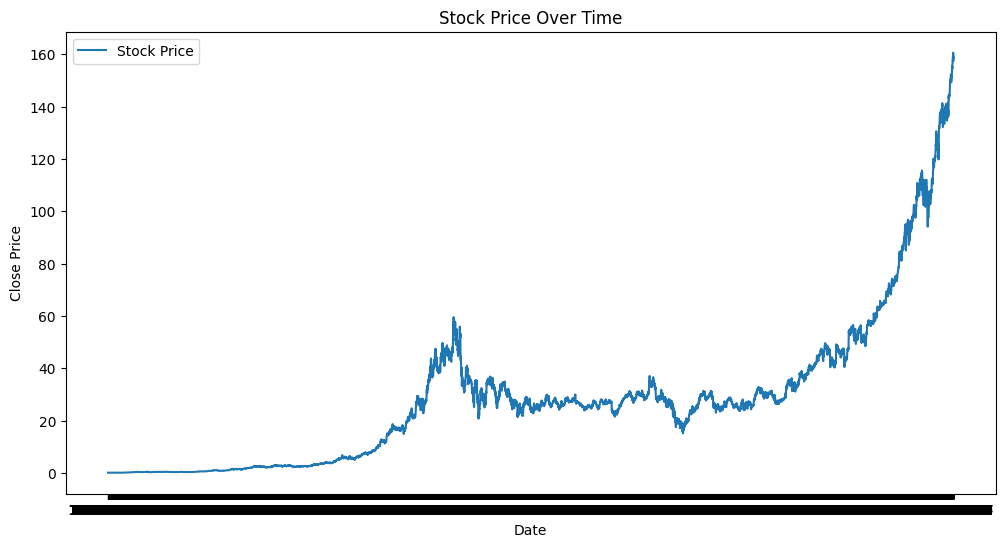

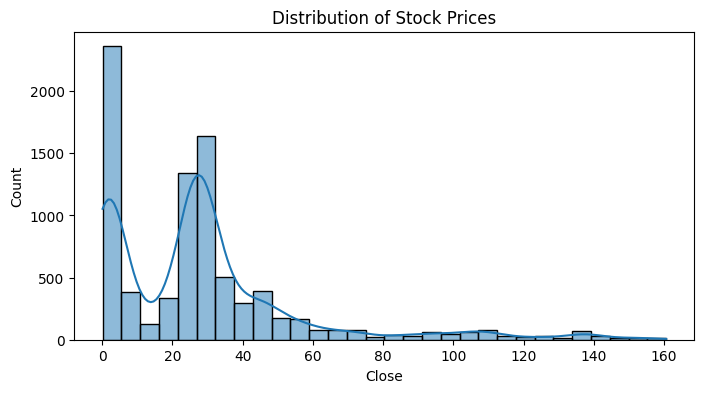

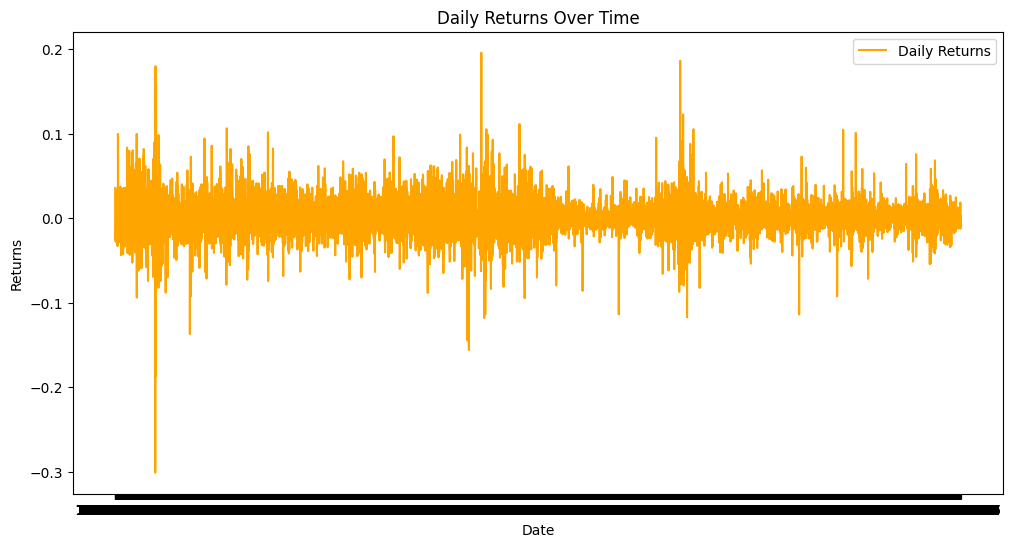

<ipython-input-6-5e40bb181fc7>:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


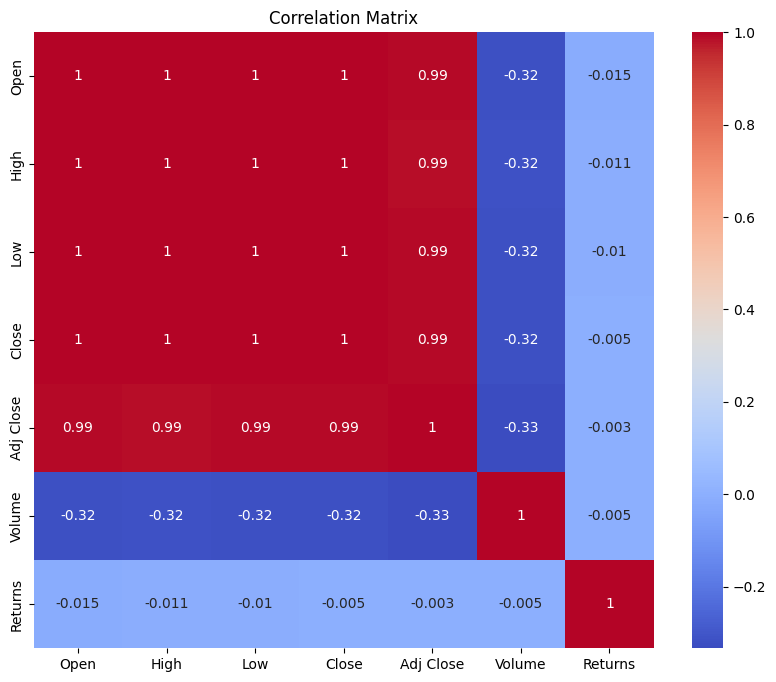

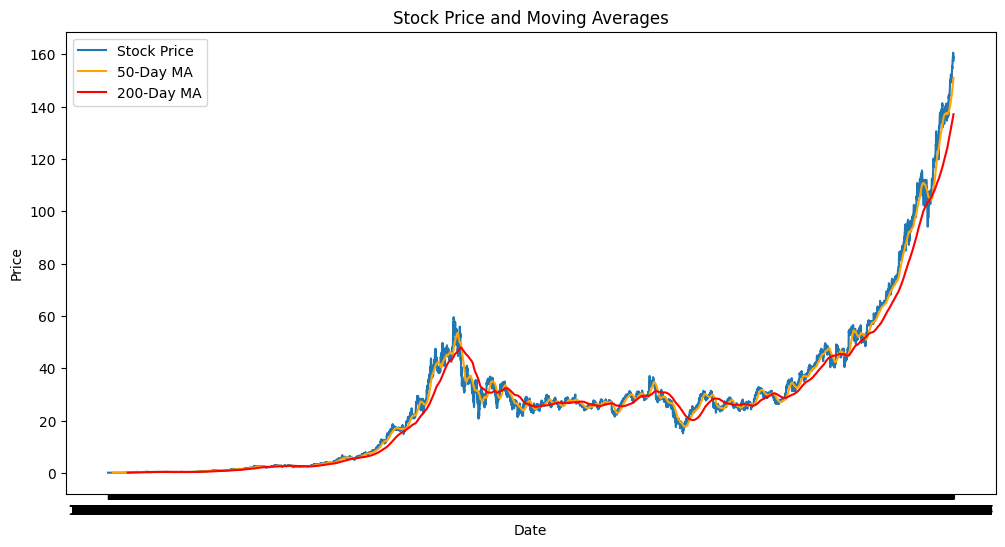

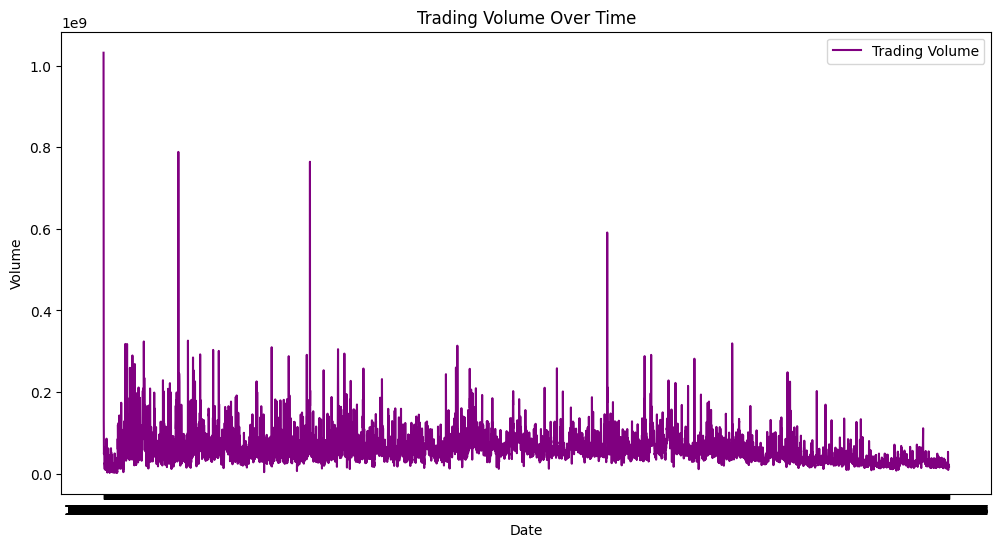

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = '/content/drive/MyDrive/Projects/Stock-price-prediction/MSFT.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.head())  # Display the first few rows
print(df.info())  # Summary of the dataset, data types, and missing values

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# Visualize the stock price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Stock Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Distribution of stock prices
plt.figure(figsize=(8, 4))
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Stock Prices')
plt.show()

# Calculate and visualize returns
df['Returns'] = df['Close'].pct_change()  # Calculate daily returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Returns'], label='Daily Returns', color='orange')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Rolling statistics (e.g., 50-day moving average)
df['50_Day_MA'] = df['Close'].rolling(window=50).mean()
df['200_Day_MA'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Stock Price')
plt.plot(df['Date'], df['50_Day_MA'], label='50-Day MA', color='orange')
plt.plot(df['Date'], df['200_Day_MA'], label='200-Day MA', color='red')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visualize trading volume
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='Trading Volume', color='purple')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


## Feature Engineering

In [20]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/Stock-price-prediction/MSFT.csv')

# Create additional features (technical indicators)
# Example 1: Moving Averages
def calculate_moving_averages(df, window=10):
    df['SMA'] = df['Close'].rolling(window=window).mean()  # Simple Moving Average
    df['EMA'] = df['Close'].ewm(span=window, adjust=False).mean()  # Exponential Moving Average

# Example 2: Relative Strength Index (RSI)
def calculate_rsi(df, window=14):
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

# Example 3: Moving Average Convergence Divergence (MACD)
def calculate_macd(df, short_window=12, long_window=26):
    short_ema = df['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = df['Close'].ewm(span=long_window, adjust=False).mean()
    df['MACD'] = short_ema - long_ema

# Call the feature engineering functions
calculate_moving_averages(df)
calculate_rsi(df)
calculate_macd(df)

# Drop rows with missing values due to rolling averages
df.dropna(inplace=True)

# Now, you can use these additional features in your model training section.


## Model training

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the target variable and features
target_column = 'Close'
X = df.drop(columns=['Date', target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")


Mean Squared Error: 0.049454099596285155
R-squared (R2) Score: 0.9999419068878214


## Evaluation

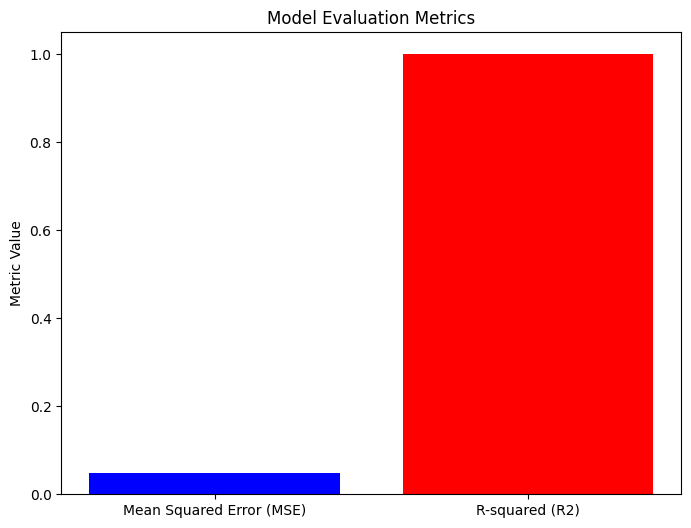

In [24]:
import matplotlib.pyplot as plt

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a bar chart for evaluation metrics
metrics = ['Mean Squared Error (MSE)', 'R-squared (R2)']
values = [mse, r2]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'red'])
plt.ylabel('Metric Value')
plt.title('Model Evaluation Metrics')
plt.show()
